<a href="https://colab.research.google.com/github/AnushkaSri1/html-portfolio/blob/main/LumpyDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Code**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

In [7]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
print(os.listdir('/content/drive/MyDrive/hcaugmented/healthycows'))


['imgs039.jpg', 'imgs053.jpg', 'imgs013.jpg', 'imgs126.jpg', 'imgs024.jpg', 'imgs082.jpg', 'imgs012.jpg', 'imgs135.jpg', 'imgs094.jpg', 'imgs093.jpg', 'imgs087.jpg', 'imgs033.jpg', 'imgs006.jpg', 'imgs112.jpg', 'imgs133.jpg', 'imgs085.jpg', 'imgs070.jpg', 'imgs140.jpg', 'imgs005.jpg', 'imgs037.jpg', 'imgs141.jpg', 'imgs029.jpg', 'imgs026.jpg', 'imgs047.jpg', 'imgs130.jpg', 'imgs081.jpg', 'imgs088.jpg', 'imgs098.jpg', 'imgs134.jpg', 'imgs019.jpg', 'imgs105.jpg', 'imgs069.jpg', 'imgs102.jpg', 'imgs058.jpg', 'imgs120.jpg', 'imgs043.jpg', 'imgs008.jpg', 'imgs035.jpg', 'imgs080.jpg', 'imgs099.jpg', 'imgs034.jpg', 'imgs060.jpg', 'imgs010.jpg', 'imgs117.jpg', 'imgs067.jpg', 'imgs118.jpg', 'imgs108.jpg', 'imgs138.jpg', 'imgs111.jpg', 'imgs021.jpg', 'imgs144.jpg', 'imgs055.jpg', 'imgs061.jpg', 'imgs015.jpg', 'imgs143.jpg', 'imgs100.jpg', 'imgs040.jpg', 'imgs041.jpg', 'imgs020.jpg', 'imgs113.jpg', 'imgs116.jpg', 'imgs086.jpg', 'imgs044.jpg', 'imgs129.jpg', 'imgs045.jpg', 'imgs018.jpg', 'imgs063.

In [9]:
X_train = []
y_train = []
image_size = 150

folderPath ='/content/drive/MyDrive/hcaugmented/healthycows'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(0)
folderPath ='/content/drive/MyDrive/hcaugmented/lumpycows'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(1)

In [11]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(936, 150, 150, 3)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [13]:
y_train.shape

(842,)

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [18]:
history=model.fit(X_train,y_train,epochs=27,validation_split=.1,callbacks=[best_model])

Epoch 1/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 765ms/step - accuracy: 0.3975 - loss: 8.4131 - val_accuracy: 0.4941 - val_loss: 0.8967
Epoch 2/27


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.5349 - loss: 0.7148 - val_accuracy: 0.3647 - val_loss: 0.9229
Epoch 3/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.4791 - loss: 0.7111 - val_accuracy: 0.4941 - val_loss: 0.8448
Epoch 4/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.5434 - loss: 0.7042 - val_accuracy: 0.4941 - val_loss: 0.7247
Epoch 5/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5406 - loss: 0.6904 - val_accuracy: 0.6706 - val_loss: 0.7142
Epoch 6/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6011 - loss: 0.6607 - val_accuracy: 0.6118 - val_loss: 0.6742
Epoch 7/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.6364 - loss: 0.6297 - val_accuracy: 0.6706 - val_loss: 0.6557
Epoch 8/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6732 - loss: 0.6087 - val_accuracy: 0.7176 - val_loss: 0.7119
Epoch 9/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6916 - loss: 0.6260 - val_accuracy: 0.6941 - val_loss: 0

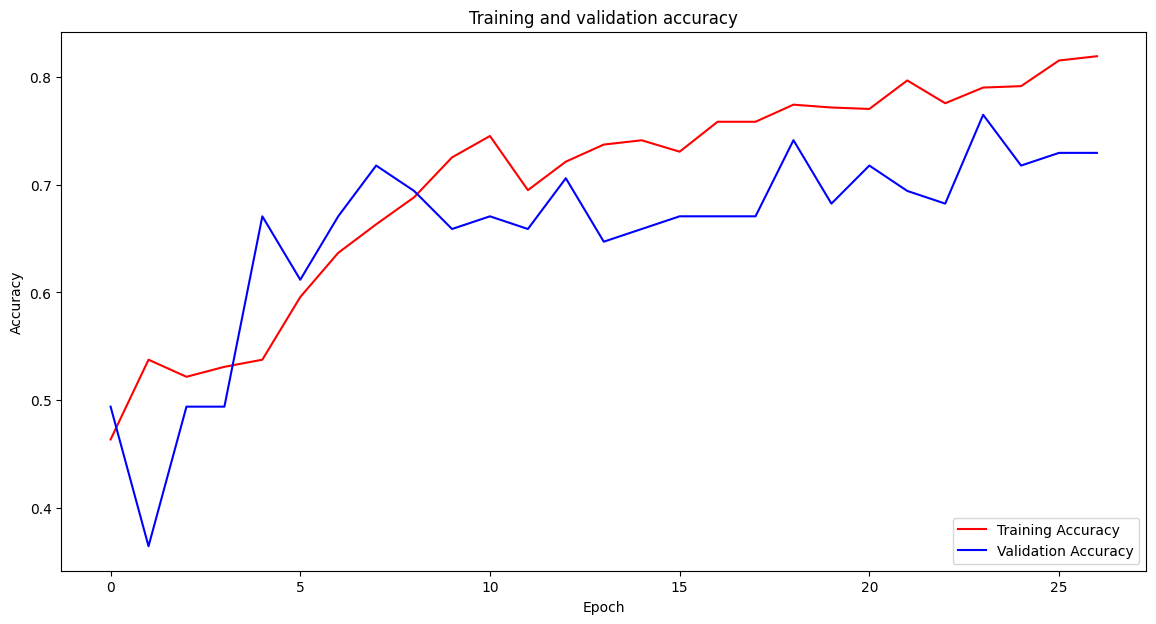

In [20]:
import matplotlib.pyplot as plt
#model.save('LumpyDisease.h5')

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

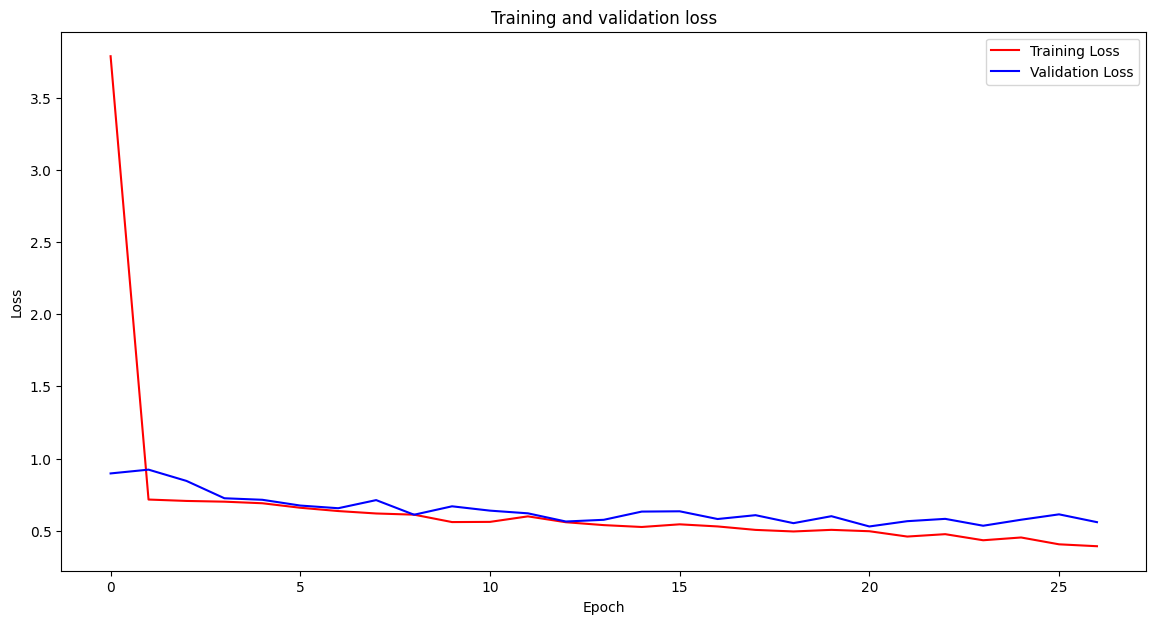

In [21]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [22]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


In [23]:
y_test.shape
pred.shape

(94,)

In [24]:
accuracy = np.sum(pred==y_test)/np.size(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

Accuracy on testing dataset: 69.15%


# Final Executable Code

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example simple model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ... (model.fit() code here)

# ✅ Save the model in Colab environment
model.save('LumpyDisease.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Set up data generators
train_dir = '/content/drive/MyDrive/hcaugmented'
val_dir ='/content/drive/MyDrive/hcaugmented'
test_dir = '/content/drive/MyDrive/hcaugmented'

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, class_mode='binary'
)
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")



Found 936 images belonging to 3 classes.
Found 936 images belonging to 3 classes.
Found 936 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 716ms/step - accuracy: 0.5001 - loss: -8127.8960 - val_accuracy: 0.5502 - val_loss: -308693.9062
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 569ms/step - accuracy: 0.5505 - loss: -1992998.1250 - val_accuracy: 0.5502 - val_loss: -21650970.0000
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 637ms/step - accuracy: 0.5455 - loss: -56743976.0000 - val_accuracy: 0.5502 - val_loss: -308568128.0000
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 563ms/step - accuracy: 0.5527 - loss: -570530112.0000 - val_accuracy: 0.5502 - val_loss: -2085892992.0000
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 568ms/step - accuracy: 0.5358 - loss: -3298273280.0000 - val_accuracy: 0.5502 - val_loss: -8969999360.0000
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 630ms/step - accuracy: 0.5538 - loss: -12554733568.0000 - val_accuracy: 0.5502 - val_loss: -28658483200.0000
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 566ms/step - accuracy: 0.5362 - loss: -38994386944.0000 - val_accuracy: 0.5502 - 

In [41]:
import cv2
import numpy as np
img = cv2.imread('/content/111.jpg')
img = cv2.resize(img,(150, 150))
img_array = np.array(img)

img_array.shape
img_array=img_array.reshape(1,150,150,3)

a=model.predict(img_array)
indices = a.argmax()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [42]:
if indices==0:
    print('Probably a Healthy cow')
else:
    print('Probably an Infected cow')

NameError: name 'indices' is not defined